The MIT License (MIT)<br>
Copyright (c) 2016, 2017, 2018 Massachusetts Institute of Technology<br>

Authors: Justin Li, Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150

In [3]:
# Gravity Recovery and Climate Experiment (GRACE) Data
# Source: http://grace.jpl.nasa.gov/
# Current surface mass change data, measuring equivalent water thickness in cm, versus time
# This data fetcher uses results from the Mascon solutions

In [4]:
from skdaccess.geo.grace.mascon.cache import DataFetcher as GR_DF
from skdaccess.framework.param_class import *

In [5]:
geo_point = AutoList([(38, -117)]) # location in Nevada
grace_fetcher = GR_DF([geo_point],start_date='2010-01-01',end_date='2014-01-01')

In [6]:
grace_data_wrapper = grace_fetcher.output() # Get a data wrapper
grace_label, grace_data = next(grace_data_wrapper.getIterator())# Get GRACE data

In [7]:
grace_data.head()

,EWD,EWD_Error
2010-01-16 12:00:00,-6.871147,1.856682
2010-02-15 00:00:00,2.071728,1.847683
2010-03-16 12:00:00,6.026260,2.088941
2010-04-16 00:00:00,3.524163,1.866020
2010-05-16 12:00:00,1.974874,1.937367


Get scale factor

In [8]:
scale_factor = grace_data_wrapper.info(grace_label)['scale_factor']

Plot EWD $\times$ scale factor

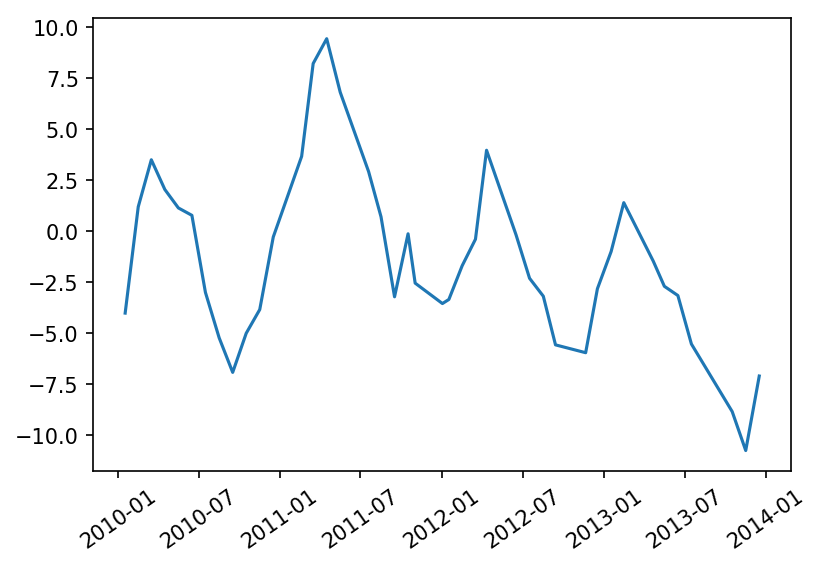

In [9]:
plt.plot(grace_data['EWD']*scale_factor);
plt.xticks(rotation=35);